# Tutorial materials
- [kan-bayashi/INTERSPEECH19_TUTORIAL](https://github.com/kan-bayashi/INTERSPEECH19_TUTORIAL)
- QR code
<img src="sprocket_png/qrcode_github.png" width=60%>

## Open sprocket demonstration


<img src="sprocket_png/sprocket_demo.png" width=80%>


<div align="center">
<img src="sprocket_png/image0001.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0002.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0003.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0004.png" width=82%>
<div align="center">

# Google colaboratory
- Welcome page
https://colab.research.google.com/notebooks/welcome.ipynb?hl=en

<div align="center">
<img src="sprocket_png/image0005.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0006.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0007.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0008.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0009.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0010.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0011.png" width=82%>
<div align="center">

# Sprocket usage and example 
https://github.com/k2kobayashi/sprocket/blob/master/docs/vc_example.md

<div align="center">
<img src="sprocket_png/image0012.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0013.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0014.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0015.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0016.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0017.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0018.png" width=82%>
<div align="center">

# Step 0: Setup
## Print Python3 version and path

In [1]:
!uname
!python -V
!which python3

Darwin
Python 3.7.3
/Users/Kazuhiro/.pyenv/versions/3.7.3/bin/python3


## Install Python3 and command dependencies
- Install Python dependency by pip command

In [21]:
!pip3 install -Uq pip
!pip3 install -q sprocket-vc
!test $(uname) == "Linux" && apt-get install -qq -y tree hdf5-tools
!echo "Done."

Done.


## Clone sprocket repository
- Clone repository and change current directory

In [22]:
!git clone https://github.com/k2kobayashi/sprocket.git -b IS19
import os
egs_dir = os.getcwd() + "/sprocket/example"
os.chdir(egs_dir)
!pwd
!ls

fatal: destination path 'sprocket' already exists and is not an empty directory.
/Users/Kazuhiro/Dropbox (個人用)/Research/Slide/2019/20190818_InterSpeechTutorial/INTERSPEECH19_TUTORIAL/notebooks/sprocket/sprocket/example/sprocket/example
conf			   downloader_conf	     run_sprocket.py
data			   initialize.py	     src
download_speech_corpus.py  list
download_vcc2016data.py    run_f0_transformation.py


## Download VCC2018 dataset 
In this tutorial, we use a subset of VCC2018 dataset
- VCC2SM1: Male source speaker
- VCC2TF1: Female target speaker

Put .wav files in ```data/wav``` directory in each speaker

If you want to use fullset of VCC2018, please delete comment out.

In [23]:
# Download subset of VCC2018 dataset for this tutorial 
!wget -q "https://drive.google.com/a/g.sp.m.is.nagoya-u.ac.jp/uc?authuser=1&id=1Gl5RjovvueMiB7XoUZsrvnBOZLiC23EU&export=download" -O wav.tar.gz
!tar zxf wav.tar.gz -C data
!tree -L 2 data/wav

# Downlaod fullset of VCC2018 dataset (it takes long time...)
# !python3 download_speech_corpus.py downloader_conf/vcc2018.yml

data/wav
├── VCC2SM1
│   ├── 10001.wav
│   ├── 10002.wav
│   ├── 10003.wav
│   ├── 10004.wav
│   ├── 10005.wav
│   ├── 10006.wav
│   ├── 10007.wav
│   ├── 10008.wav
│   ├── 10009.wav
│   ├── 10010.wav
│   ├── 10011.wav
│   ├── 10012.wav
│   ├── 10013.wav
│   ├── 10014.wav
│   ├── 10015.wav
│   ├── 10016.wav
│   ├── 10017.wav
│   ├── 10018.wav
│   ├── 10019.wav
│   ├── 10020.wav
│   ├── 30001.wav
│   ├── 30002.wav
│   ├── 30003.wav
│   ├── 30004.wav
│   └── 30005.wav
└── VCC2TF1
    ├── 10001.wav
    ├── 10002.wav
    ├── 10003.wav
    ├── 10004.wav
    ├── 10005.wav
    ├── 10006.wav
    ├── 10007.wav
    ├── 10008.wav
    ├── 10009.wav
    ├── 10010.wav
    ├── 10011.wav
    ├── 10012.wav
    ├── 10013.wav
    ├── 10014.wav
    ├── 10015.wav
    ├── 10016.wav
    ├── 10017.wav
    ├── 10018.wav
    ├── 10019.wav
    ├── 10020.wav
    ├── 30001.wav
    ├── 30002.wav
    ├── 30003.wav
    ├── 30004.wav
    └── 30005.wav

2 directories, 50 files


# Step0:  Initialization
Run ```ininitialize.py``` in ```sprocket/example``` directory

### Options for ```initialize.py```
- -1: Generate list file
- -2: Generate yml files (speaker- and pair-dependent)
- -3: Generate histograms
- <source_speaker\>: Source speaker label (e.g., VCC2SM1)
- <target_speaker\>: Target speaker label (e.g., VCC2TF1)
- <sampling_frequency\>: Sampling frequency of audio files (22050 for VCC2018)

### Run ```initialize.py``` to generate list and yml

In [24]:
# python3 initialize.py -1 -2 <source_speaker> <target_speaker> <sampling_frequency>
!python3 initialize.py -1 -2 VCC2SM1 VCC2TF1 22050

### 1. create initial list files ###
Generate list/VCC2SM1_train.list
Generate list/VCC2TF1_train.list
Generate list/VCC2SM1_eval.list
Generate list/VCC2TF1_eval.list
# Please modify train and eval list files, if you want. #
### 2. create configure files ###
Generate conf/speaker/VCC2SM1.yml
Generate conf/speaker/VCC2TF1.yml
Generate conf/pair/VCC2SM1-VCC2TF1.yml


- List file (```list/*.list```): Line up path of audio files without extention
    - Training: ```*_train.list```
    - Evaluation: ```*_eval.list``` 
- Speaker-dependent yml file (```conf/speaker/*.yml```)
    - Define speaker-dependent parameters
- Pair-dependent yml file (```conf/pair/*.yml```)
    - Define pair-dependent parameters

### Modify list files to specify training and evaluation utterances

We use following utterances int this tutorial:
- Training: 20 utterances
- Evaluation: 5 utterances

Attention to create list files
- Length and order of training list files of source and target speaker must be same
- Do not overlap utterances between training and evaluation for fair evaluation

In [25]:
os.chdir("list")
!echo "$(head -n 20 VCC2SM1_train.list)" > VCC2SM1_train.list
!echo "$(head -n 20 VCC2TF1_train.list)" > VCC2TF1_train.list
!echo "$(tail -n 5 VCC2SM1_eval.list)" > VCC2SM1_eval.list
!echo "$(tail -n 5 VCC2TF1_eval.list)" > VCC2TF1_eval.list
!echo "Training set"
!paste VCC2SM1_train.list VCC2TF1_train.list
!echo "Evaluation set"
!paste VCC2SM1_eval.list VCC2TF1_eval.list
os.chdir(egs_dir)

Training set
VCC2SM1/10001	VCC2TF1/10001
VCC2SM1/10002	VCC2TF1/10002
VCC2SM1/10003	VCC2TF1/10003
VCC2SM1/10004	VCC2TF1/10004
VCC2SM1/10005	VCC2TF1/10005
VCC2SM1/10006	VCC2TF1/10006
VCC2SM1/10007	VCC2TF1/10007
VCC2SM1/10008	VCC2TF1/10008
VCC2SM1/10009	VCC2TF1/10009
VCC2SM1/10010	VCC2TF1/10010
VCC2SM1/10011	VCC2TF1/10011
VCC2SM1/10012	VCC2TF1/10012
VCC2SM1/10013	VCC2TF1/10013
VCC2SM1/10014	VCC2TF1/10014
VCC2SM1/10015	VCC2TF1/10015
VCC2SM1/10016	VCC2TF1/10016
VCC2SM1/10017	VCC2TF1/10017
VCC2SM1/10018	VCC2TF1/10018
VCC2SM1/10019	VCC2TF1/10019
VCC2SM1/10020	VCC2TF1/10020
Evaluation set
VCC2SM1/30001	VCC2TF1/30001
VCC2SM1/30002	VCC2TF1/30002
VCC2SM1/30003	VCC2TF1/30003
VCC2SM1/30004	VCC2TF1/30004
VCC2SM1/30005	VCC2TF1/30005


## Set speaker- and pair-dependent parameters
### Representative parameters
- Speaker-dependent
    - F0 range
    - Power threshold
- Pair-dependent
    - \# of mixture components
    - \# of iterations


### Generate F0 histogram
Run ```initialize.py``` with ```-3``` option
- Extract F0 and npow and create their histograms
    - F0: Fundamental frequency
    - npow: Power sequence

In [26]:
!python3 initialize.py -3 VCC2SM1 VCC2TF1 22050

### 3. create figures to define parameters ###
Extract: data/wav/VCC2SM1/10001.wav
Extract: data/wav/VCC2SM1/10002.wav
Extract: data/wav/VCC2SM1/10003.wav
Extract: data/wav/VCC2SM1/10004.wav
Extract: data/wav/VCC2SM1/10005.wav
Extract: data/wav/VCC2SM1/10006.wav
Extract: data/wav/VCC2SM1/10007.wav
Extract: data/wav/VCC2SM1/10008.wav
Extract: data/wav/VCC2SM1/10009.wav
Extract: data/wav/VCC2SM1/10010.wav
Extract: data/wav/VCC2SM1/10011.wav
Extract: data/wav/VCC2SM1/10012.wav
Extract: data/wav/VCC2SM1/10013.wav
Extract: data/wav/VCC2SM1/10014.wav
Extract: data/wav/VCC2SM1/10015.wav
Extract: data/wav/VCC2SM1/10016.wav
Extract: data/wav/VCC2SM1/10017.wav
Extract: data/wav/VCC2SM1/10018.wav
Extract: data/wav/VCC2SM1/10019.wav
Extract: data/wav/VCC2SM1/10020.wav
Extract: data/wav/VCC2TF1/10001.wav
Extract: data/wav/VCC2TF1/10002.wav
Extract: data/wav/VCC2TF1/10003.wav
Extract: data/wav/VCC2TF1/10004.wav
Extract: data/wav/VCC2TF1/10005.wav
Extract: data/wav/VCC2TF1/10006.wav
Extract: data/wav

<div align="center">
<img src="sprocket_png/image0019.png" width=82%>
<div align="center">

### Show F0 historgram
F0 histogram saves into ```conf/figure``` directory

VCC2SM1


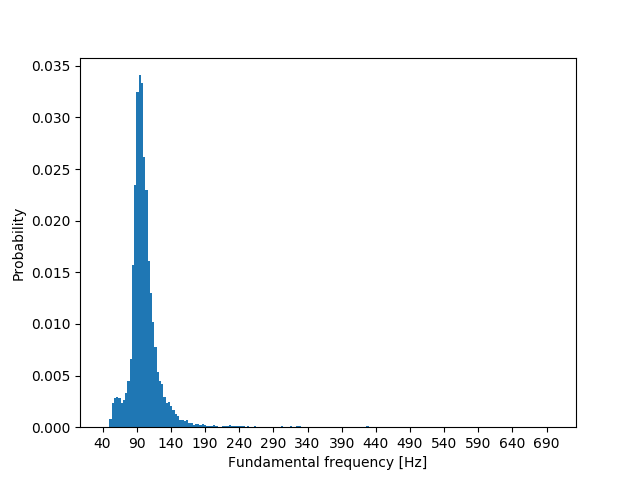

VCC2TF1


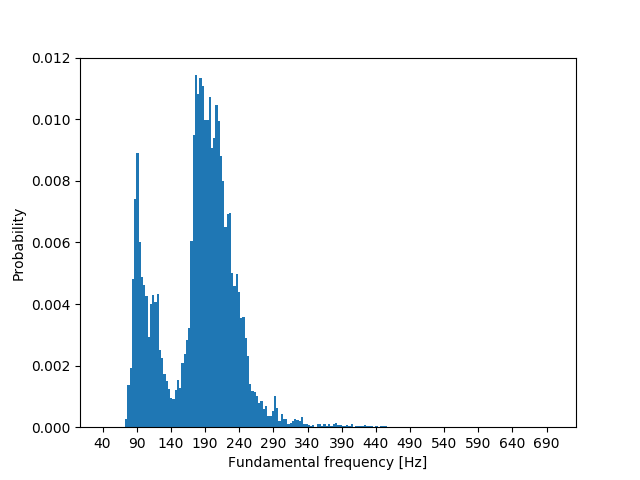

In [27]:
from IPython.display import Image, display_png
print("VCC2SM1")
display_png(Image("conf/figure/VCC2SM1_f0histogram.png"))
print("VCC2TF1")
display_png(Image("conf/figure/VCC2TF1_f0histogram.png"))

### Modify speaker-dependent yml
Set F0 range in each source and target speaker

- VCC2SM1:
    - Minimum F0: 50
    - Maximum F0: 190
- VCC2TF1:
    - Minimum F0: 140
    - Maximum F0: 320

In [28]:
os.chdir('conf/speaker')
import yaml
with open('VCC2SM1.yml', 'r') as fp:
    yml = yaml.load(fp, Loader=yaml.BaseLoader)
    yml['f0']['minf0'] = 50
    yml['f0']['maxf0'] = 190
with open('VCC2SM1.yml', 'w') as fp:
    yaml.dump(yml, fp)
with open('VCC2TF1.yml', 'r') as fp:
    yml = yaml.load(fp, Loader=yaml.BaseLoader)
    yml['f0']['minf0'] = 140
    yml['f0']['maxf0'] = 320
with open('VCC2TF1.yml', 'w') as fp:
    yaml.dump(yml, fp)

# confirm
!cat VCC2SM1.yml VCC2TF1.yml | grep f0
os.chdir(egs_dir)

f0:
  maxf0: 190
  minf0: 50
f0:
  maxf0: 320
  minf0: 140


### Modify pair-dependent yml file

Set following parameters in this tutorial

- Covariance type to ```block_diag```
- \# of mixture components for mel-cepstrum GMM to 16
- \# of iteration to 2

In [29]:
os.chdir('conf/pair')
import yaml
with open('VCC2SM1-VCC2TF1.yml', 'r') as fp:
    yml = yaml.load(fp, Loader=yaml.BaseLoader)
    yml['GMM']['mcep']['covtype'] = 'block_diag'
    yml['GMM']['mcep']['n_mix'] = 16
    yml['jnt']['n_iter'] = 2

# write yml file
with open('VCC2SM1-VCC2TF1.yml', 'w') as fp:
    yaml.dump(yml, fp)
!cat VCC2SM1-VCC2TF1.yml
os.chdir(egs_dir)

GMM:
  codeap:
    covtype: full
    cvtype: mlpg
    n_iter: '100'
    n_mix: '16'
  mcep:
    covtype: block_diag
    cvtype: mlpg
    n_iter: '100'
    n_mix: 16
GV:
  morph_coeff: '1.0'
jnt:
  n_iter: 2


<div align="center">
<img src="sprocket_png/image0020.png" width=82%>
<div align="center">

# ```run_sprocket.py```
After initialization, the main process is excuted by ```run_sprocket.py```

## Options for ```run_sprocket.py```
- -1: Acoustic feature extraction
- -2: Estimate speaker-dependent statistics
- -3: Estimate alignment
- -4: Train GMM
- -5: Conversion
- <source_speaker\>: Source speaker label (e.g., VCC2SM1)
- <target_speaker\>: Target speaker label (e.g., VCC2TF1)



# Step1: Feature extraction
## Extract acoustic feature vector in each speaker

In [33]:
# python3 run_sprocket -1 <source_speaker> <target_speaker>
!python3 run_sprocket.py -1 VCC2SM1 VCC2TF1
!echo "Done."

### 1. Extract acoustic features ###
Acoustic features already exist: data/pair/VCC2SM1-VCC2TF1/h5/VCC2SM1/10001.h5
Acoustic features already exist: data/pair/VCC2SM1-VCC2TF1/h5/VCC2SM1/10002.h5
Acoustic features already exist: data/pair/VCC2SM1-VCC2TF1/h5/VCC2SM1/10003.h5
Acoustic features already exist: data/pair/VCC2SM1-VCC2TF1/h5/VCC2SM1/10004.h5
Extract acoustic features: data/wav/VCC2SM1/10005.wav
Extract acoustic features: data/wav/VCC2SM1/10006.wav
Extract acoustic features: data/wav/VCC2SM1/10007.wav
Extract acoustic features: data/wav/VCC2SM1/10008.wav
Extract acoustic features: data/wav/VCC2SM1/10009.wav
Extract acoustic features: data/wav/VCC2SM1/10010.wav
Extract acoustic features: data/wav/VCC2SM1/10011.wav
Extract acoustic features: data/wav/VCC2SM1/10012.wav
Extract acoustic features: data/wav/VCC2SM1/10013.wav
Extract acoustic features: data/wav/VCC2SM1/10014.wav
Extract acoustic features: data/wav/VCC2SM1/10015.wav
Extract acoustic features: data/wav/VCC2SM1/10016.wav

<div align="center">
<img src="sprocket_png/image0021.png" width=82%>
<div align="center">

## Confirm feature vector
Feature vectors are stored into single HDF5 format file in each utterance in ```data/pair/VCC2SM1-VCC2TF1/h5``` directory

- Confirm HDF5 files

In [34]:
!tree -L 4 data/pair/VCC2SM1-VCC2TF1/h5

data/pair/VCC2SM1-VCC2TF1/h5
├── VCC2SM1
│   ├── 10001.h5
│   ├── 10002.h5
│   ├── 10003.h5
│   ├── 10004.h5
│   ├── 10005.h5
│   ├── 10006.h5
│   ├── 10007.h5
│   ├── 10008.h5
│   ├── 10009.h5
│   ├── 10010.h5
│   ├── 10011.h5
│   ├── 10012.h5
│   ├── 10013.h5
│   ├── 10014.h5
│   ├── 10015.h5
│   ├── 10016.h5
│   ├── 10017.h5
│   ├── 10018.h5
│   ├── 10019.h5
│   └── 10020.h5
└── VCC2TF1
    ├── 10001.h5
    ├── 10002.h5
    ├── 10003.h5
    ├── 10004.h5
    ├── 10005.h5
    ├── 10006.h5
    ├── 10007.h5
    ├── 10008.h5
    ├── 10009.h5
    ├── 10010.h5
    ├── 10011.h5
    ├── 10012.h5
    ├── 10013.h5
    ├── 10014.h5
    ├── 10015.h5
    ├── 10016.h5
    ├── 10017.h5
    ├── 10018.h5
    ├── 10019.h5
    └── 10020.h5

2 directories, 40 files


### Look inside of h5 file

In [35]:
!h5ls data/pair/VCC2SM1-VCC2TF1/h5/VCC2SM1/10001.h5

codeap                   Dataset {1176, 2}
f0                       Dataset {1176}
mcep                     Dataset {1176, 35}
npow                     Dataset {1176}


- codeap: Coded aperiodicity
- f0: Fundamental frequency
- mcep: Mel-cepstrum
- npow: Power sequence

<div align="center">
<img src="sprocket_png/image0022.png" width=82%>
<div align="center">

# Step2: Speaker-dependent statisitcs estimation

Estimate speaker-dependent statistics such as F0 and GV

- An HDF5 file storing speaker-dependent statistics is save in ```data/pair/VCC2SM1-VCC2TF1/stats``` directory

In [36]:
!python3 run_sprocket.py -2 VCC2SM1 VCC2TF1
!echo "Done."


### 2. Estimate acoustic feature statistics ###
f0stats save into data/pair/VCC2SM1-VCC2TF1/stats/VCC2SM1.h5
gvstats save into data/pair/VCC2SM1-VCC2TF1/stats/VCC2SM1.h5
f0stats save into data/pair/VCC2SM1-VCC2TF1/stats/VCC2TF1.h5
gvstats save into data/pair/VCC2SM1-VCC2TF1/stats/VCC2TF1.h5
Done.


<div align="center">
<img src="sprocket_png/image0023.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0024.png" width=82%>
<div align="center">

# Step3: Time-warping function extraction
Estimate alignment between source and target feature vector

In [37]:
!python3 run_sprocket.py -3 VCC2SM1 VCC2TF1
!echo "Done."

### 3. Estimate time warping function and jnt ###
## Alignment mcep w/o 0-th and silence ##
1-th joint feature extraction starts.
distortion [dB] for 1-th file: 10.643071543743195
distortion [dB] for 2-th file: 10.054424632507223
distortion [dB] for 3-th file: 10.669591598699558
distortion [dB] for 4-th file: 10.923556792818454
distortion [dB] for 5-th file: 10.514658408328712
distortion [dB] for 6-th file: 10.971968613701838
distortion [dB] for 7-th file: 12.487712331130538
distortion [dB] for 8-th file: 10.179038741208144
distortion [dB] for 9-th file: 10.898523652564359
distortion [dB] for 10-th file: 11.201037312692335
distortion [dB] for 11-th file: 11.553381664244874
distortion [dB] for 12-th file: 10.980749207888651
distortion [dB] for 13-th file: 10.85993740482855
distortion [dB] for 14-th file: 11.386364620219231
distortion [dB] for 15-th file: 10.90053335406652
distortion [dB] for 16-th file: 12.447420409501285
distortion [dB] for 17-th file: 11.62863737785678
distortion [dB]

<div align="center">
<img src="sprocket_png/image0025.png" width=82%>
<div align="center">

## Confirm output time-warping function
twf files are stored ```data/pair/VCC2SM1-VCC2TF1/twf``` directory

In [39]:
!tree -L 3 data/pair/VCC2SM1-VCC2TF1/twf

data/pair/VCC2SM1-VCC2TF1/twf
├── it2_10001.h5
├── it2_10002.h5
├── it2_10003.h5
├── it2_10004.h5
├── it2_10005.h5
├── it2_10006.h5
├── it2_10007.h5
├── it2_10008.h5
├── it2_10009.h5
├── it2_10010.h5
├── it2_10011.h5
├── it2_10012.h5
├── it2_10013.h5
├── it2_10014.h5
├── it2_10015.h5
├── it2_10016.h5
├── it2_10017.h5
├── it2_10018.h5
├── it2_10019.h5
└── it2_10020.h5

0 directories, 20 files


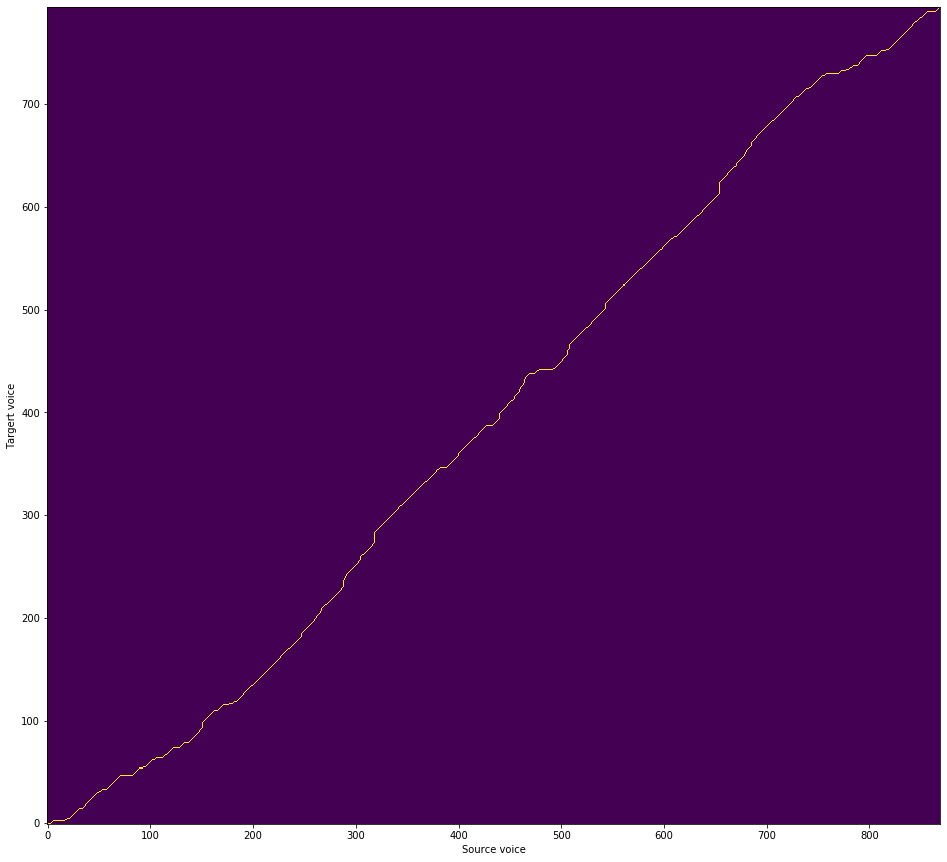

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sprocket.util import HDF5

# read twf from hdf5 file
h5 = HDF5('data/pair/VCC2SM1-VCC2TF1/twf/it2_10001.h5', 'a')
twf = h5.read('twf')
h5.close()

# plot twf
twf_mat = np.zeros((np.max(twf[1]) + 1, np.max(twf[0]) + 1))
twf_mat[twf[1], twf[0]] = 1
plt.figure(figsize=(16, 16))
plt.xlabel('Source voice')
plt.ylabel('Targert voice')
plt.imshow(twf_mat, origin='lower')
plt.show()

<div align="center">
<img src="sprocket_png/image0026.png" width=82%>
<div align="center">

# Step4: GMM training
Train GMM using source and target feature vectors and time-warping function

In [43]:
!python3 run_sprocket.py -4 VCC2SM1 VCC2TF1
!echo "Done."

### 4. Train GMM and converted GV ###
Conversion model for mcep save into data/pair/VCC2SM1-VCC2TF1/model/GMM_mcep.pkl
Converted gvstats save into data/pair/VCC2SM1-VCC2TF1/model/cvgv.h5
Done.


<div align="center">
<img src="sprocket_png/image0027.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0028.png" width=82%>
<div align="center">

# Step5: Conversion
Conversion based on VC and DIFFVC

In [42]:
!python3 run_sprocket.py -5 VCC2SM1 VCC2TF1
!echo "Done."

### 5. Conversion based on the trained models ###
GMM for mcep conversion mode: None
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30001_VC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30002_VC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30003_VC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30004_VC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30005_VC.wav
GMM for mcep conversion mode: diff
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30001_DIFFVC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30002_DIFFVC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30003_DIFFVC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30004_DIFFVC.wav
data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30005_DIFFVC.wav
Done.


<div align="center">
<img src="sprocket_png/image0029.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0030.png" width=82%>
<div align="center">

## Show converted samples
Converted voices are stored into ```data/pair/VCC2SM1-VCC2TF1/test``` directory

In [44]:
import IPython.display
print("Source voice")
IPython.display.display(IPython.display.Audio("data/wav/VCC2SM1/30001.wav"))
print("Target voice")
IPython.display.display(IPython.display.Audio("data/wav/VCC2TF1/30001.wav"))
print("Converted by VC")
IPython.display.display(IPython.display.Audio("data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30001_VC.wav"))
print("Converted by DIFFVC")
IPython.display.display(IPython.display.Audio("data/pair/VCC2SM1-VCC2TF1/test/VCC2SM1/30001_DIFFVC.wav"))

Source voice


Target voice


Converted by VC


Converted by DIFFVC


<div align="center">
<img src="sprocket_png/image0031.png" width=82%>
<div align="center">

# Converted samples of VCC 2018

You can download all converted samples using fullset

URL: https://nuss.nagoya-u.ac.jp/index.php/s/Cs0YbTCw85p3QDK

<div align="center">
<img src="sprocket_png/image0032.png" width=82%>
<div align="center">

<div align="center">
<img src="sprocket_png/image0033.png" width=82%>
<div align="center">

# Next recipe
WaveNet Vocoder  Demonstration 

- Open on Google colaboratory
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kan-bayashi/INTERSPEECH19_TUTORIAL/blob/master/notebooks/wavenet_vocoder/wavenet_vocoder.ipynb)